In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import re
import nltk
import mplcursors
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from dateutil import parser
from datetime import datetime
from typing import List
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [130]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
poli = pd.read_csv('politicos.csv')

In [132]:
poli.head()

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
0,0,['1453442766982287361'],1,2021-10-27T19:25:33.000Z,"PARABÉNS, PRESIDENTE LULA | 76 anos com energi...",1423,16845,939,323,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['parabens', 'presidente', 'lula', 'ano', 'ene...",NaN,['#equipelula'],NaN
1,1,['1453676921393324036'],1,2021-10-28T10:56:00.000Z,Ao vivo em instantes: https://t.co/DC3AqHTIDc,139,607,42,14,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['viver', 'instante']",NaN,NaN,NaN
2,2,['1453681221603581952'],1,2021-10-28T11:13:05.000Z,Entrevista de Lula para a Rádio Jovem Pan de S...,630,3013,319,57,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['entrevisto', 'lula', 'radiar', 'jovem', 'pan...",NaN,NaN,NaN
3,3,['1453682338941095940'],1,2021-10-28T11:17:32.000Z,Fiz 76 anos ontem com muito orgulho. Não sinto...,1702,27763,1853,318,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['fazer', 'ano', 'ontem', 'orgulhar', 'sentir'...",NaN,NaN,NaN
4,4,['1453685308755746818'],1,2021-10-28T11:29:20.000Z,Para que a iniciativa privada se apodere do Es...,734,4697,302,66,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['iniciativo', 'privar', 'apoderar', 'estar', ...",NaN,NaN,NaN


In [133]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

C:\Users\mrggi\AppData\Local\Temp\ipykernel_18376\3167007018.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

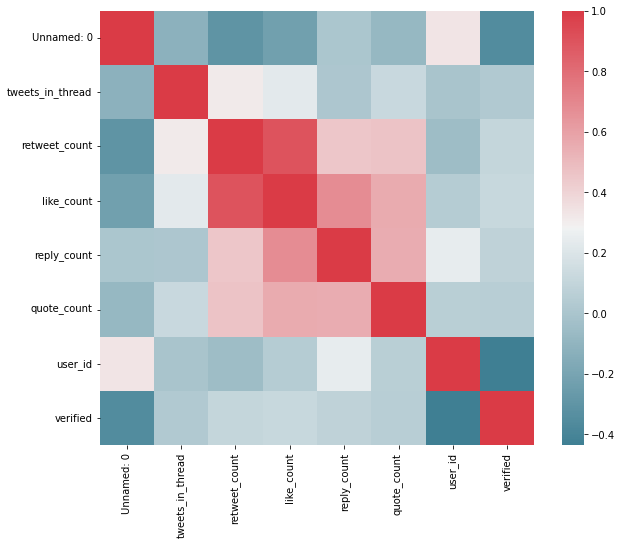

In [134]:
f, ax = plt.subplots(figsize=(10, 8))
corr = poli.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [135]:
poli.groupby(['username'])['tweets_id'].count()

username
AndreJanonesAdv    655
LeoPericlesUP      417
LulaOficial        586
SF_Moro            714
Sen_Alessandro     517
SimoneTebetms      623
aldorebelo         661
cirogomes          630
jairbolsonaro      482
jdoriajr           687
lfdavilaoficial    459
Name: tweets_id, dtype: int64

#### Hashtags

In [136]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords =stopwords.words('portuguese')

In [137]:
poli['user_name'].unique()

array(['Lula', 'Jair M. Bolsonaro', 'André Janones', 'Simone Tebet',
       "Felipe d'Avila", 'Ciro Gomes', 'João Doria', 'Sergio Moro',
       'Aldo Rebelo', 'Leo Péricles', 'Senador Alessandro Vieira'],
      dtype=object)

In [138]:
poli.hashtags.fillna(' ')
test = poli.hashtags.astype(str).apply(lambda x: x.replace('[','').replace(']','').replace('\'','').strip())
poli.hashtags = test

*Bolsonaro nao usa hashtags?*

In [139]:
# Lula
poli[poli.user_name == 'Jair M. Bolsonaro'].hashtags.value_counts().reset_index()

,index,hashtags
0,nan,482


In [140]:
hashtags = poli[poli.user_name == 'Lula'].hashtags.value_counts().reset_index().drop(0)
hashtags

,index,hashtags
1,#equipelula,61
2,#76fatossobrelula,26
3,#lulaaovivo,10
4,#pt42anos,10
5,#lulanacbnvale,9
...,...,...
70,#76fatossobrelula23,1
71,#76fatossobrelula22,1
72,#76fatossobrelula21,1
73,#76fatossobrelula20,1


In [141]:
poli.hashtags=='#equipelula'

0        True
1       False
2       False
3       False
4       False
        ...  
6426    False
6427    False
6428    False
6429    False
6430    False
Name: hashtags, Length: 6431, dtype: bool

In [142]:

mu = poli[(poli.hashtags=='#equipelula')].like_count.mean()
sigma = poli[(poli.hashtags=='#equipelula')].like_count.std()

<AxesSubplot:>

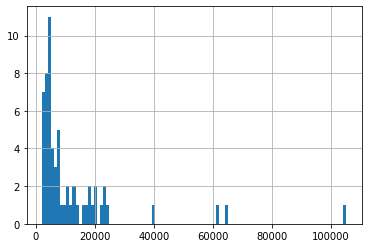

In [143]:
poli[(poli.hashtags=='#equipelula')].like_count.hist(bins=100)

<AxesSubplot:>

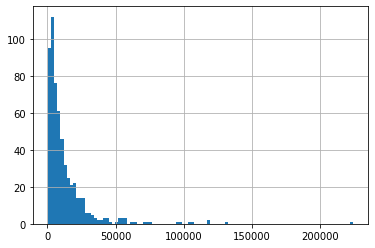

In [144]:
poli[(poli.user_name == 'Lula')].like_count.hist(bins = 100)

In [145]:
poli[(poli.user_name == 'Lula')].shape

(586, 18)

<AxesSubplot:>

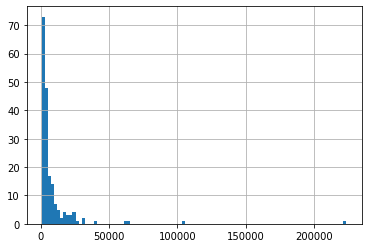

In [146]:
poli[(poli.user_name == 'Lula') & (poli.hashtags != 'nan')].like_count.hist(bins = 100)

In [147]:
poli

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
0,0,['1453442766982287361'],1,2021-10-27T19:25:33.000Z,"PARABÉNS, PRESIDENTE LULA | 76 anos com energi...",1423,16845,939,323,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['parabens', 'presidente', 'lula', 'ano', 'ene...",NaN,#equipelula,NaN
1,1,['1453676921393324036'],1,2021-10-28T10:56:00.000Z,Ao vivo em instantes: https://t.co/DC3AqHTIDc,139,607,42,14,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['viver', 'instante']",NaN,nan,NaN
2,2,['1453681221603581952'],1,2021-10-28T11:13:05.000Z,Entrevista de Lula para a Rádio Jovem Pan de S...,630,3013,319,57,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['entrevisto', 'lula', 'radiar', 'jovem', 'pan...",NaN,nan,NaN
3,3,['1453682338941095940'],1,2021-10-28T11:17:32.000Z,Fiz 76 anos ontem com muito orgulho. Não sinto...,1702,27763,1853,318,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['fazer', 'ano', 'ontem', 'orgulhar', 'sentir'...",NaN,nan,NaN
4,4,['1453685308755746818'],1,2021-10-28T11:29:20.000Z,Para que a iniciativa privada se apodere do Es...,734,4697,302,66,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['iniciativo', 'privar', 'apoderar', 'estar', ...",NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,6426,['1501213533261996034'],1,2022-03-08T15:09:32.000Z,A discussão sobre fertilizantes não exige mine...,140,1337,58,17,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['discussao', 'sobrar', 'fertilizante', 'exigi...",NaN,nan,NaN
6427,6427,['1501241756448342024'],1,2022-03-08T17:01:41.000Z,Recebi a visita do amigo e governador @jdoriaj...,68,1651,412,28,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['receber', 'visitar', 'amigar', 'governador',...",['@jdoriajr'],nan,NaN
6428,6428,['1501294583552126979'],1,2022-03-08T20:31:36.000Z,O governador Belivaldo consolida o seu total d...,18,215,10,3,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['governador', 'belivaldo', 'consolidar', 'tot...",NaN,nan,NaN
6429,6429,['1501708638121086978'],1,2022-03-09T23:56:54.000Z,Sem educação não existe futuro. A aprovação do...,73,956,84,5,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['educacao', 'existir', 'futurar', 'aprovacao'...",NaN,nan,NaN


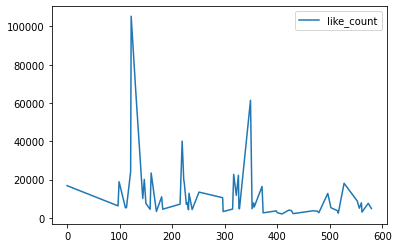

In [148]:
df = poli[(poli.hashtags=='#equipelula')][['like_count','created_at']].plot()




In [149]:
polititians = poli['user_name'].unique()
for polititian in polititians:
    hashtags = poli[poli.user_name == polititian].hashtags.value_counts().reset_index()
    print(polititian, end = ': ')
    print(f'{list(hashtags["index"][1:6])}')
    print()


Lula: ['#equipelula', '#76fatossobrelula', '#lulaaovivo', '#pt42anos', '#lulanacbnvale']

Jair M. Bolsonaro: []

André Janones: ['#naojogueopovonarua', '#distritaonao', '#cpidacovid', '#pazuelloday', '#tokyo2020']

Simone Tebet: ['#cpidacovid', '#cpidacovid, #covaxin', '#sousimonesim, #frentedemocratica', '#sousimonesim, #frentedemocra, #tebetpresidente, #simonetebetms', '#simonetebet2022, #mdb, #mdbcomsimone2022']

Felipe d'Avila: ['#ladod', '#debatelide', '#2022emdebate', '#maisfunda', '#lfdavila, #novo']

Ciro Gomes: ['#cirogames', '#reactdocira', '#convenc', '#convenc, #cirorebeldiadaesperanc', '#cironacnn']

João Doria: ['#transpare, #governosp', '#spmaisseguro', '#tbt', '#vacinassalvam', '#vacinaja']

Sergio Moro: ['#moronoflow', '#moronoceara', '#abreascontasbolsolula', '#vacinasim', '#sqn']

Aldo Rebelo: ['#darcyfaz99, #99anosdarcyribeiro']

Leo Péricles: ['#forabolsonaro', '#leonardopericles, #leopericles2022, #unidadepopular, #socialismo, #poderpopular, #eleic, #presidenciave

In [150]:
poli.hashtags.unique()

array(['#equipelula', 'nan', '#76fatossobrelula1', '#76fatossobrelula2',
       '#76fatossobrelula3', '#76fatossobrelula4', '#76fatossobrelula5',
       '#76fatossobrelula6', '#76fatossobrelula7', '#76fatossobrelula8',
       '#76fatossobrelula9', '#76fatossobrelula10', '#76fatossobrelula11',
       '#76fatossobrelula12', '#76fatossobrelula13',
       '#76fatossobrelula14', '#76fatossobrelula15',
       '#76fatossobrelula16', '#equipelulavi', '#76fatossobrelula17',
       '#76fatossobrelula18', '#76fatossobrelula19',
       '#76fatossobrelula20', '#76fatossobrelula21',
       '#76fatossobrelula22', '#76fatossobrelula23',
       '#76fatossobrelula24', '#76fatossobrelula25',
       '#76fatossobrelula26', '#76fatossobrelula27',
       '#76fatossobrelula28', '#76fatossobrelula29',
       '#76fatossobrelula30', '#76fatossobrelula31',
       '#76fatossobrelula32', '#76fatossobrelula33',
       '#76fatossobrelula34', '#76fatossobrelula35',
       '#76fatossobrelula36', '#76fatossobrelula37',


## Contagem de hashtags ao longo do tempo

In [151]:
def hashtag_pattern(df: pd.DataFrame, hashtag: List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}


    timeline_df = df[['created_at', 'hashtags']].copy()

    pal = list(sns.color_palette(palette='viridis', n_colors=len(hashtag)).as_hex())

    fig = go.Figure()
    for d,p in zip(hashtag, pal):

        searcher = re.compile(d)

        hash_df = timeline_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        hash_df.created_at = hash_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        hashtag_df = hash_df[filter].groupby("created_at").count().reset_index()

        hashtag_df.created_at = pd.to_datetime(hashtag_df.created_at, format=formats[granularidade])

        hashtag_df.sort_values('created_at', inplace=True)

        print(hashtag_df)


        fig.add_trace(go.Scatter(x = hashtag_df.created_at,
                                y = hashtag_df.hashtags,
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()

    
    
    

In [152]:
hashtag_pattern(poli, ['fatossobrelula', 'equipelula'], granularidade='d')

  created_at  hashtags
4 2021-10-31        29
0 2021-11-01        14
1 2021-11-02        14
2 2021-11-03         9
3 2021-11-04         9
   created_at  hashtags
47 2021-10-27         1
53 2021-10-31         1
14 2021-11-09         1
18 2021-11-10         1
27 2021-11-15         3
29 2021-11-16         1
31 2021-11-17         1
35 2021-11-18         1
36 2021-11-19         1
37 2021-11-20         2
40 2021-11-21         1
50 2021-11-29         1
51 2021-11-30         1
0  2021-12-01         1
4  2021-12-03         2
5  2021-12-04         2
7  2021-12-06         1
10 2021-12-07         1
15 2021-12-09         2
19 2021-12-10         1
23 2021-12-12         1
32 2021-12-17         1
49 2021-12-28         2
20 2022-01-11         1
22 2022-01-12         1
24 2022-01-14         1
30 2022-01-17         2
33 2022-01-18         1
38 2022-01-21         1
42 2022-01-23         1
44 2022-01-24         2
46 2022-01-27         2
48 2022-01-28         1
52 2022-01-31         2
1  2022-02-02         

## Número de likes por hashtag

In [153]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

In [154]:
# box plot com média de likes

def box_hash(df: pd.DataFrame, hashtag: List[str], metric: str, log: bool = True) -> np.nan:
    """_summary_

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): list of hashtags to visualize
        metric (str): metric to visualize
        log (bool, optional): use log scale or not Defaults to True.

    Returns:
        np.nan: Doesn't return anything
    """




    like_df = df[[metric, 'hashtags']].copy()

    fig = go.Figure()
    
    

    for hash in hashtag:

        searcher = re.compile(hash)

        hash_df = like_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        fig.add_trace(go.Box(y=hash_df[filter][metric], name=hash))

    if log:
        fig.update_layout(yaxis_type="log")          

    fig.show()


    

In [155]:
box_hash(poli, ['equipelula','sus'], 'reply_count')

#### Wordclouds

In [156]:
def extract_words(palavras: str):
    pat = re.compile("(?<=\')(.*?)(?=\')")
    words = pat.findall(palavras)[::2]
    return words

extract_words("teste")

[]

In [157]:
extract_words(poli.clean_text.iloc[0])

['parabens',
 'presidente',
 'lula',
 'ano',
 'energia',
 'esperanca',
 'foto',
 'ricardo',
 'stuckert']

In [158]:
texts = list(poli[(poli.hashtags=='#equipelula') & (poli.user_name == 'Lula')].clean_text.apply(extract_words).apply(lambda x: ' '.join(x)))
vectorizer = CountVectorizer().fit_transform(texts)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim.shape

(61, 61)

In [159]:
def words_candidate(candidate_name: str):
    candidate = ' '.join(list(poli[poli.user_name == candidate_name].clean_text.apply(lambda x: ' '.join(extract_words(x)))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()
    return candidate

In [160]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

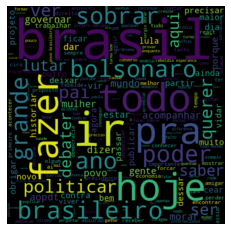

'ciro estara viver datena dentro minuto ver ir dizer sobrar absurdo perseguicao policiar federal tempo canalha bolsonaro policiar federal vir casar nunca ano ninguem levantar suspeito achar cidadao acima lei achar todo mundo poder dever ser investigar qualquer tipo denunciar acusacaotrocaram delegar superintendente daqui fato delacao acontecer sobrar fato acontecer envolver porque proprio delator dizer nunca falar comigo envolver nisso explicacao todo homem publicar obrigacao defender ter ser acusar injustamente ser preocupar capaz demonstrar violencia sofrer dispositivo bolsonarista tomar contar partir instituicoes obrigar presidente estar policial bolsonaro ameaca democracia todo democrata considerar obrigacao dar todo esclarecimento necessarios respeitar povo brasileiro fazer logo horar estar entrevisto talar fazer josias sousa fabiola cidral assim fazer programar datena ir explicar detalhe policiar federal bolsonaro fazer armacao prejudicar obrigar presidente seguir firmar lutar br

In [161]:
words_candidate('Ciro Gomes')

In [162]:
def words_hashtag(df: pd.DataFrame, candidate: str, hashtag: str):

    searcher = re.compile(hashtag)
    hash_df = df.copy()
    filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)
    hash_df.clean_text = hash_df.clean_text.apply(lambda x: extract_words(x))
    hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: x.remove(candidate) if (candidate in x) else x)
    hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: x.remove(candidate.lower()) if (candidate.lower() in x) else x)
    candidate = ' '.join(list(hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: ' '.join(x))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()

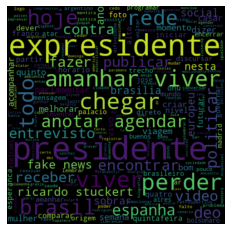

In [163]:
words_hashtag(poli, 'Lula', 'equipelula')

#### Sankey

In [164]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

In [165]:
def hash_sankey(df, hashtag, candidate, general = True):

    candidate_df = df[df.user_name==candidate].copy()

    hash_dict = {i:[] for i in hashtag}

    if general:
        limit = candidate_df.reply_count.mean()
        candidate_df['high_reply'] = candidate_df.reply_count > limit

    for hash in hashtag:
        searcher = re.compile(hash)
        filter = candidate_df.hashtags.apply(lambda x: True if searcher.search(x) else False)
        hash_df = candidate_df[filter].copy()
        if not(general):
            limit = hash_df.reply_count.mean()
            hash_df['high_reply'] = hash_df.reply_count > limit
        plot_df = hash_df.groupby("high_reply").count().reset_index()
        false = plot_df[plot_df.high_reply==False].reply_count.iloc[0] if len(plot_df[plot_df.high_reply==False].reply_count) > 0 else 0
        true = plot_df[plot_df.high_reply==True].reply_count.iloc[0] if len(plot_df[plot_df.high_reply==True].reply_count) > 0 else 0
        hash_dict[hash].extend([true,false])
        print(hash_dict)

    source = []
    target = []
    value = []

    for i, hash in enumerate(hashtag):
        source.extend(2*[i])
        value.extend(hash_dict[hash])

    target.extend(len(hashtag)*[len(hashtag), len(hashtag)+1])

    
    print(source)
    print(target)
    print(value)
    hashtag.extend(['popular','impopular'])
    print(hashtag)
    pal = list(sns.color_palette(palette='viridis', n_colors=len(hashtag)).as_hex())

    fig = go.Figure(data=[go.Sankey(
        node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = hashtag,
        color = pal
        ),
        link = dict(
        source = source, 
        target = target,
        value = value
    ))])

    fig.show()

In [166]:
hash_sankey(poli, ['equipelula','fatossobrelula','lulaaovivo'], 'Lula', general = False)

{'equipelula': [21, 49], 'fatossobrelula': [], 'lulaaovivo': []}
{'equipelula': [21, 49], 'fatossobrelula': [23, 52], 'lulaaovivo': []}
{'equipelula': [21, 49], 'fatossobrelula': [23, 52], 'lulaaovivo': [5, 5]}
[0, 0, 1, 1, 2, 2]
[3, 4, 3, 4, 3, 4]
[21, 49, 23, 52, 5, 5]
['equipelula', 'fatossobrelula', 'lulaaovivo', 'popular', 'impopular']


#### Spider chart

In [167]:
def spider_metric(df, hashtag, candidate):
    
    candidate_df = df[df.user_name==candidate].copy()

    for hash in hashtag:

        searcher = re.compile(hash)

        filter = candidate_df.hashtags.apply(lambda x: True if searcher.search(x) else False)
        
        fig = px.line_polar(df, r='r', theta='theta', line_close=True)

    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.show()


## Temporal

In [168]:
poli.user_name.unique()

array(['Lula', 'Jair M. Bolsonaro', 'André Janones', 'Simone Tebet',
       "Felipe d'Avila", 'Ciro Gomes', 'João Doria', 'Sergio Moro',
       'Aldo Rebelo', 'Leo Péricles', 'Senador Alessandro Vieira'],
      dtype=object)

In [169]:
like_df=poli[['created_at','like_count']].copy()

In [170]:
poli[poli.user_name=='Jair M. Bolsonaro']

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
586,586,"['1438838014004891650', '1438838687450734597',...",3,2021-09-17T12:11:29.000Z,"- O investimento total, em 2021, tanto em leit...",3454,19161,581,35,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['investimento', 'total', 'tanto', 'leito', 'u...","['@govbr', '@minsaude', '@mqueiroga2', '@secom...",nan,NaN
587,587,"['1438947763237048323', '1438948310971293697',...",3,2021-09-17T19:27:35.000Z,"- Somente no mês de agosto, o @JusticaGovBR (M...",6301,34476,853,114,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['somente', 'mes', 'agostar', 'mjsp', 'arrecad...","['@JusticaGovBR', '@andersongtorres']",nan,NaN
588,588,['1438986684780195844'],1,2021-09-17T22:02:15.000Z,🇧🇷 Cerimônia de Lançamento do Projeto Pró-Água...,3986,18147,881,172,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['cerimoniar', 'lancamento', 'projeto', 'proag...","['@mdregional_br', '@rogeriosmarinho', '@govbr']",nan,['🇧🇷']
589,589,"['1439185525274038273', '1439185591422308353']",2,2021-09-18T11:12:22.000Z,- O desempenho das contas públicas é resultado...,6256,34670,1235,122,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['desempenhar', 'contar', 'publicar', 'resulta...","['@govbr', '@BancoCentralBR', '@secomvc']",nan,NaN
590,590,['1439282512145100807'],1,2021-09-18T17:37:46.000Z,"🇧🇷 Mara Rosa/GO, 17 Set 21.\n- Ordem de serviç...",3819,18306,806,142,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['mara', 'rosago', 'set', 'ordem', 'servico', ...",NaN,nan,['🇧🇷']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1063,"['1502110958726098945', '1502110961334992947',...",3,2022-03-11T02:35:35.000Z,"- Abaixo, aqueles que dizem ter sido vítimas d...",14773,73412,2672,473,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['abaixar', 'dizer', 'ter', 'ser', 'vitimar', ...",NaN,nan,['👍']
1064,1064,['1502207295111020544'],1,2022-03-11T08:58:23.000Z,- PARAÍBA / João Pessoa: O @govbr inaugurou o...,3642,14390,1234,133,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['paraiba', 'joao', 'pessoa', 'inaugurar', 'ob...","['@govbr', '@mdregional_br', '@rogeriosmarinho']",nan,NaN
1065,1065,"['1502573731327184901', '1502573790634680325',...",3,2022-03-12T09:14:28.000Z,"- O @govbr , por meio do @mdregional_br , rep...",7379,36579,1582,185,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['mear', 'repassar', 'recurso', 'continuidade'...","['@govbr', '@mdregional_br']",nan,NaN
1066,1066,"['1502934725840756740', '1502934728294506501',...",3,2022-03-13T09:08:56.000Z,"- Da gestação até os 6 anos, a primeira infânc...",7867,39177,900,167,128372940,jairbolsonaro,Jair M. Bolsonaro,https://pbs.twimg.com/profile_images/105763148...,True,"['gestacao', 'ano', 'primeiro', 'infancia', 'f...","['@govbr', '@MinCidadania', '@joaoromaneto']",nan,NaN


In [171]:
def metric_curve(df: pd.DataFrame, metric: str, politicians=List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}

    pal = list(sns.color_palette(palette='viridis', n_colors=len(politicians)).as_hex())

    fig = go.Figure()
    for d,p in zip(politicians, pal):

        filter = df.user_name == d

        metric_df = df[filter][['created_at',metric, 'user_name']].copy()
        
        metric_df.created_at = metric_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        politician_df = metric_df[metric_df.user_name == d]

        plot_df = politician_df.groupby("created_at").sum().reset_index()

        plot_df.created_at = pd.to_datetime(plot_df.created_at, format=formats[granularidade])

        plot_df.sort_values('created_at', inplace=True)

        print(plot_df)


        fig.add_trace(go.Scatter(x = plot_df.created_at,
                                y = plot_df[metric],
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()


In [172]:
metric_curve(poli, 'like_count', ['Lula','Jair M. Bolsonaro'])

  created_at  like_count
0 2021-10-01      211627
1 2021-11-01     1615854
2 2021-12-01     2002724
3 2022-01-01     1505789
4 2022-02-01     1534049
5 2022-03-01      757618
  created_at  like_count
0 2021-09-01     1233217
1 2021-10-01     2349608
2 2021-11-01     1943334
3 2021-12-01     1842220
4 2022-01-01     2483832
5 2022-02-01     3318123
6 2022-03-01     1301403


In [173]:
def activity_curve(df: pd.DataFrame, politicians=List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y',
                'semana': '%a',
                'hora': '%H'}

    pal = list(sns.color_palette(palette='viridis', n_colors=len(politicians)).as_hex())

    fig = go.Figure()
    for d,p in zip(politicians, pal):

        filter = df.user_name == d

        metric_df = df[filter][['created_at','user_name']].copy()
        
        metric_df.created_at = metric_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        politician_df = metric_df[metric_df.user_name == d]

        plot_df = politician_df.groupby("created_at").count().reset_index()

        if granularidade == 'hora':

            plot_df.created_at = plot_df.created_at.astype(int)
        
        if granularidade in ['d','m','y']:

            plot_df.created_at = pd.to_datetime(plot_df.created_at, format=formats[granularidade])


        plot_df.sort_values('created_at', inplace=True)

        fig.add_trace(go.Scatter(x = plot_df.created_at,
                                y = plot_df.user_name,
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()

In [174]:
activity_curve(poli, ['Lula','Jair M. Bolsonaro'], granularidade='hora')